# Creating Word Vectors with word2vec

In this notebook, we create word vectors from a corpus of public-domain books, a selection from [Project Gutenberg](https://www.gutenberg.org/).

#### Load dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Load data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
len(gutenberg.fileids())

18

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Tokenize text

In [7]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [8]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [9]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [10]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [11]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [12]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [13]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [14]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [15]:
gberg_sents[4][14]

'father'

In [16]:
# another convenient method that we don't immediately need: 
gutenberg.words() 

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [ ]:
# gutenberg.words() is analogous to the following line, which need not be run: 
# word_tokenize(gutenberg.raw())

In [18]:
# our Gutenberg corpus is 2.6m words in length: 
len(gutenberg.words())

2621613

#### Run word2vec

In [20]:
# model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [21]:
# model.save('raw_gutenberg_model.w2v')

#### Explore model

In [22]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [41]:
model.wv['dog']

array([ 0.4216107 , -0.26525953, -0.1319205 , -0.05142083,  0.01548322,
       -0.44379956, -0.43864462, -0.2586898 ,  0.40506905,  0.14206952,
       -0.1249959 , -0.13038833,  0.00461912,  0.00934265, -0.05747442,
        0.01221561, -0.42999566,  0.1325402 ,  0.7401418 ,  0.31080174,
       -0.07088728,  0.12136814, -0.14595936, -0.1353325 , -0.08580589,
        0.2616416 ,  0.29364446, -0.24096294, -0.02250204,  0.21877997,
        0.00687561, -0.45792767, -0.1342474 , -0.15267695,  0.01016932,
        0.551737  ,  0.6093151 ,  0.23894654, -0.30351445,  0.22455053,
       -0.03042334, -0.15474574,  0.26100048,  0.32955822,  0.21925563,
       -0.38083136, -0.3564618 ,  0.09137528, -0.06389016, -0.38183892,
        0.22193797,  0.03397031, -0.4039202 , -0.34734392,  0.4131019 ,
        0.11380992, -0.23641421,  0.14751665, -0.3015756 ,  0.18551816,
       -0.33426377,  0.5629048 , -0.17621793,  0.6069166 ], dtype=float32)

In [40]:
len(model.wv['dog'])

64

In [39]:
model.wv.most_similar('dog') # distance

[('puppy', 0.832916796207428),
 ('thief', 0.7844164371490479),
 ('sweeper', 0.7763339877128601),
 ('pig', 0.767580509185791),
 ('cage', 0.763363778591156),
 ('pet', 0.7465853691101074),
 ('shell', 0.7425347566604614),
 ('eel', 0.7320302724838257),
 ('broth', 0.7296205163002014),
 ('chimney', 0.7290040254592896)]

In [38]:
model.wv.most_similar('think')

[('suppose', 0.8841403126716614),
 ('contradict', 0.836374044418335),
 ('downright', 0.8362067341804504),
 ('manage', 0.8295542001724243),
 ('_you_', 0.8144626617431641),
 ('know', 0.8143092393875122),
 ('awfully', 0.8127231597900391),
 ('NOW', 0.8115946054458618),
 ('really', 0.8065925240516663),
 ('pretend', 0.8044694662094116)]

In [37]:
model.wv.most_similar('day')

[('morning', 0.8213363289833069),
 ('time', 0.7306052446365356),
 ('night', 0.7139753699302673),
 ('evening', 0.7139678597450256),
 ('month', 0.7097997069358826),
 ('week', 0.6801174879074097),
 ('sabbath', 0.671021044254303),
 ('morrow', 0.6666308641433716),
 ('fourteenth', 0.6594470739364624),
 ('fortnight', 0.6572687029838562)]

In [36]:
model.wv.most_similar('father')

[('mother', 0.8687034845352173),
 ('brother', 0.8358397483825684),
 ('sister', 0.8133758902549744),
 ('daughter', 0.7701701521873474),
 ('Amnon', 0.7680689096450806),
 ('wife', 0.7678396105766296),
 ('uncle', 0.7345079779624939),
 ('servant', 0.7314029932022095),
 ('master', 0.730115532875061),
 ('Tamar', 0.7185598611831665)]

In [33]:
model.wv.doesnt_match("mother father daughter dog".split())

'dog'

In [34]:
model.wv.similarity('father', 'dog')

0.4604792214596723

In [35]:
# close, but not quite; distinctly in female direction: 
model.wv.most_similar(positive=['father', 'woman'], negative=['man']) 

[('sister', 0.7934002876281738),
 ('mother', 0.7813659310340881),
 ('wife', 0.747301459312439),
 ('daughter', 0.7452553510665894),
 ('husband', 0.7402283549308777),
 ('Sarah', 0.7315459251403809),
 ('brother', 0.7113776803016663),
 ('Sarai', 0.7087254524230957),
 ('Amnon', 0.6877561211585999),
 ('Rachel', 0.6857811212539673)]

In [42]:
# more confident about this one: 
model.wv.most_similar(positive=['son', 'woman'], negative=['man']) 

[('Sarah', 0.74388188123703),
 ('Leah', 0.7432646751403809),
 ('wife', 0.7426124215126038),
 ('Hagar', 0.7393292188644409),
 ('Bethuel', 0.7375929355621338),
 ('Sarai', 0.7292698621749878),
 ('Hittite', 0.7220444083213806),
 ('Nahor', 0.7184099555015564),
 ('Bilhah', 0.7154064774513245),
 ('daughter', 0.712986946105957)]

In [43]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man']) 

[('wife', 0.7225892543792725),
 ('sister', 0.7036935091018677),
 ('conceived', 0.6719903945922852),
 ('child', 0.6710282564163208),
 ('mother', 0.6664979457855225),
 ('daughter', 0.6542869806289673),
 ('widow', 0.6428157687187195),
 ('maid', 0.6289151906967163),
 ('nurse', 0.6202231049537659),
 ('elder', 0.6163309812545776)]

In [44]:
model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=30) 

[('Sarah', 0.7570387125015259),
 ('Rachel', 0.7335041761398315),
 ('Pharaoh', 0.7009136080741882),
 ('Solomon', 0.6940141320228577),
 ('Leah', 0.6936554908752441),
 ('Abram', 0.6901487112045288),
 ('Sarai', 0.6885069608688354),
 ('Bethuel', 0.6873000264167786),
 ('Hagar', 0.6855733394622803),
 ('Laban', 0.6844937205314636),
 ('Rebekah', 0.6755105257034302),
 ('Ephron', 0.6737706661224365),
 ('Bilhah', 0.6627413034439087),
 ('damsel', 0.6610320806503296),
 ('queen', 0.6606974601745605),
 ('Heth', 0.658852219581604),
 ('Hamor', 0.6586244702339172),
 ('Esau', 0.6580380201339722),
 ('Padanaram', 0.6574106216430664),
 ('birthright', 0.6551170349121094),
 ('Mephibosheth', 0.6511939764022827),
 ('tribute', 0.6511174440383911),
 ('Joseph', 0.651037335395813),
 ('princes', 0.6508769989013672),
 ('Hittite', 0.6497414112091064),
 ('Uriah', 0.6480649709701538),
 ('David', 0.6474607586860657),
 ('Zilpah', 0.6463907957077026),
 ('Babylon', 0.643268346786499),
 ('magicians', 0.6409218907356262)]

In [34]:
# impressive for such a small data set, without any cleaning, e.g., to lower case (covered next)

#### Reduce word vector dimensionality with t-SNE

In [45]:
model.wv.vocab

{'[': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777e48>,
 'Emma': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777550>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fa3bb7775c0>,
 'Jane': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777358>,
 ']': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777d68>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7fa3bb7772b0>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777cf8>,
 'Woodhouse': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777668>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777a90>,
 'handsome': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777cc0>,
 'clever': <gensim.models.keyedvectors.Vocab at 0x7fa3bb7775f8>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777b38>,
 'rich': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777080>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777ef0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fa3bb777978>,
 'comfortable': <gensim.models.keyedvectors.Vocab at 0x7fa3

In [46]:
len(model.wv.vocab)

17011

In [48]:
X = model.wv[model.wv.vocab]

In [49]:
tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [50]:
X_2d = tsne.fit_transform(X)

In [51]:
X_2d[0:5]

array([[  9.945513, -55.80311 ],
       [-53.388023, -35.085735],
       [-38.586227,  15.428925],
       [-55.18636 , -32.0022  ],
       [  9.906224, -55.752365]], dtype=float32)

In [52]:
# create DataFrame for storing results and plotting
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [53]:
coords_df.head()

,x,y,token
0,9.945513,-55.803108,[
1,-53.388023,-35.085735,Emma
2,-38.586227,15.428925,by
3,-55.186359,-32.002201,Jane
4,9.906224,-55.752365,]


In [55]:
# coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [56]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

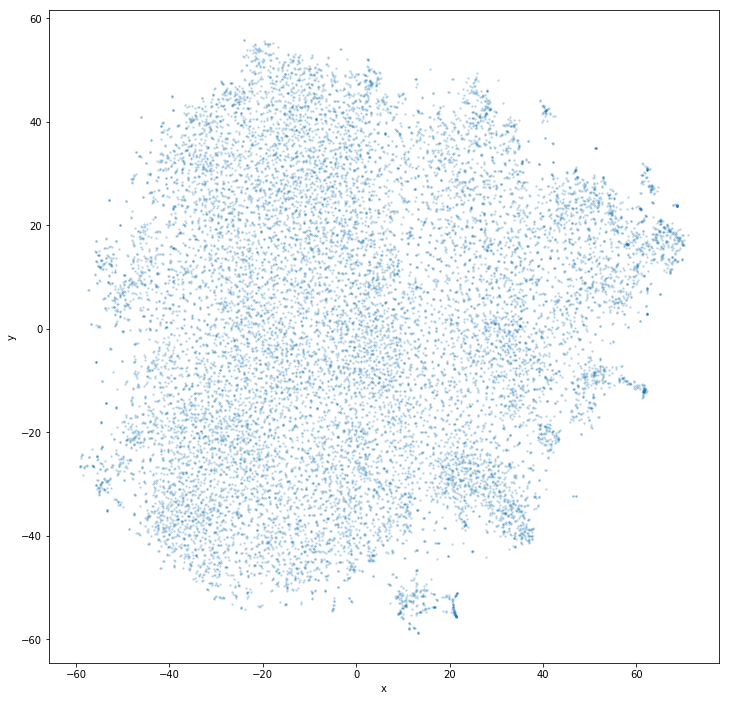

In [57]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [58]:
output_notebook() # output bokeh plots inline in notebook

Loading BokehJS ...

In [59]:
subset_df = coords_df.sample(n=5000)

In [60]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [61]:
show(p)